In [2]:
import numpy as np
import pandas as pd
import sklearn as skl
import matplotlib.pyplot as plt
import seaborn as sea
import math



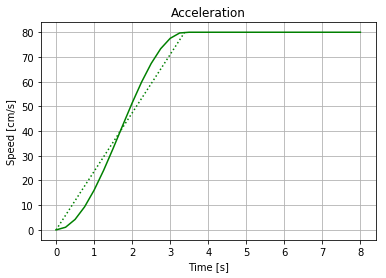

In [44]:
a  = 142 / 6 # base acceleration
T  = 8 # time frame
V  = 80 # autocruise speed
Fs = 0.25 # sampling rate
m  = 30 # mass kg
Ts  = np.arange(0, T + Fs, Fs) #sampling time

def ideal_acceleration(_t, _V, _a):
    if _t < 0:
        return 0
    if _t < _V / _a:
        sin_ratio = (math.pi / (_V / _a)) * _t - math.pi / 2
    else:
        sin_ratio = math.pi / 2
    return _V * (1 + math.sin(sin_ratio)) / 2
    
v1 = [ideal_acceleration(time, V, a) for time in Ts]


def feedback_acceleration():
    pass




#x = np.linspace(1, 1, 300)
#y = np.arange(0,150, 0.5)
# plt.figure(dpi=160)
plt.grid(True)
plt.title('Acceleration')
# plt.plot([0,T],[V,V],'y--')
plt.plot(Ts,v1,'g-')
plt.plot([0,V / a],[0,V],'g:')
plt.xlabel('Time [s]')
plt.ylabel('Speed [cm/s]')
plt.show()

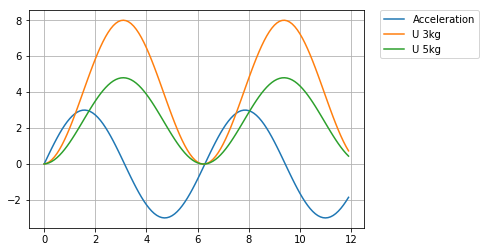

In [45]:
m = 4 #kg
F = 12 #N
T = 12 # time frame

y = np.arange(0, T, 0.1)
x = np.sin(y)

a = [F * f / m for f in x]

def calc_velocities(_t, _F, _m):
    _v = [0]
    for i, time in enumerate(_t):
        if i == 0:
            continue
        _t_diff = _t[i] - _t[i-1]
        _a = (_F * math.sin(time)) / _m
        _v.append(_v[i-1] + _a * _t_diff) 
    return _v


# plt.figure(dpi=160)
plt.grid(True)
# plt.plot(y,x, label='Sin')
plt.plot(y,a, label='Acceleration')
plt.plot(y,calc_velocities(y, F, 3), label='U 3kg')
plt.plot(y,calc_velocities(y, F, 5), label='U 5kg')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

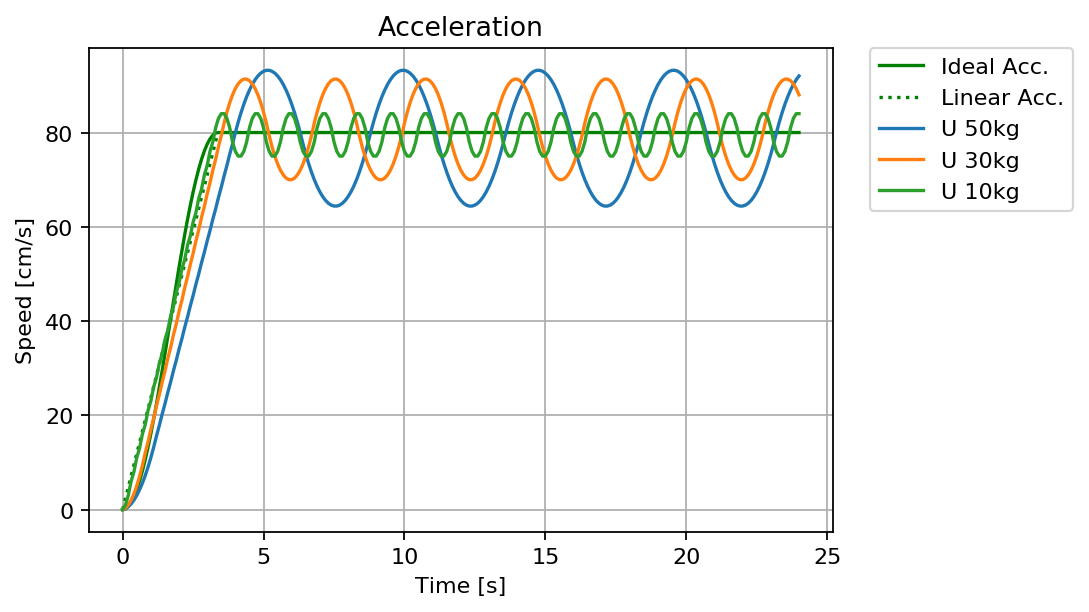

In [46]:
a  = 142 / 6 # base acceleration
T  = 24 # time frame
V  = 80 # autocruise speed
Fs = 0.1 # sampling rate
m  = 30 # mass kg
Ts  = np.arange(0, T + Fs, Fs) #sampling time

def ideal_acceleration(_t, _V, _a):
    if _t < 0:
        return 0
    if _t < _V / _a:
        sin_ratio = (math.pi / (_V / _a)) * _t - math.pi / 2
    else:
        sin_ratio = math.pi / 2
    return _V * (1 + math.sin(sin_ratio)) / 2
    
v1 = [ideal_acceleration(time, V, a) for time in Ts]


    
def autocruising(_t, _m, _a, _Vt, _V0 = 0, _IncF = 100, _Fc = 0):
    """
       _t: list of time
       _m: mass in kg
       _a: base acceleration
      _Vt: desired autocruising velocity
      _V0: start velocity
    _IncF: increments for force in Newtons
      _Fc: start force
    """
    _Ac = 0 # current acceleration
    _At = 0 # target acceleration
    _v = [_V0] # velocities [start velocity]
    for i, time in enumerate(_t):
        if i == 0:
            continue
        _At = ( math.copysign(_a, _Vt - _v[i-1]) if (_v[i-1] != _Vt) else 0)
        if (_Ac != _At):
            _Fc = _Fc + math.copysign(_IncF, _At - _Ac)
        _Ac = _Fc / _m
        _t_diff = _t[i] - _t[i-1]
        _v.append(_v[i-1] + _Ac * _t_diff)
    return _v


#x = np.linspace(1, 1, 300)
#y = np.arange(0,150, 0.5)
plt.figure(dpi=160)
plt.grid(True)
plt.title('Acceleration')
# plt.plot([0,T],[V,V],'y--')
plt.plot(Ts,v1,'g-', label='Ideal Acc.')
plt.plot([0,V / a],[0,V],'g:', label='Linear Acc.')
plt.plot(Ts, autocruising(Ts, 50, a, V), label='U 50kg')
plt.plot(Ts, autocruising(Ts, 30, a, V), label='U 30kg')
plt.plot(Ts, autocruising(Ts, 10, a, V), label='U 10kg')
plt.xlabel('Time [s]')
plt.ylabel('Speed [cm/s]')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

I should try to check ramining time to meet the desired speed.
Stabile acceleration means force can directly related to acceleration.

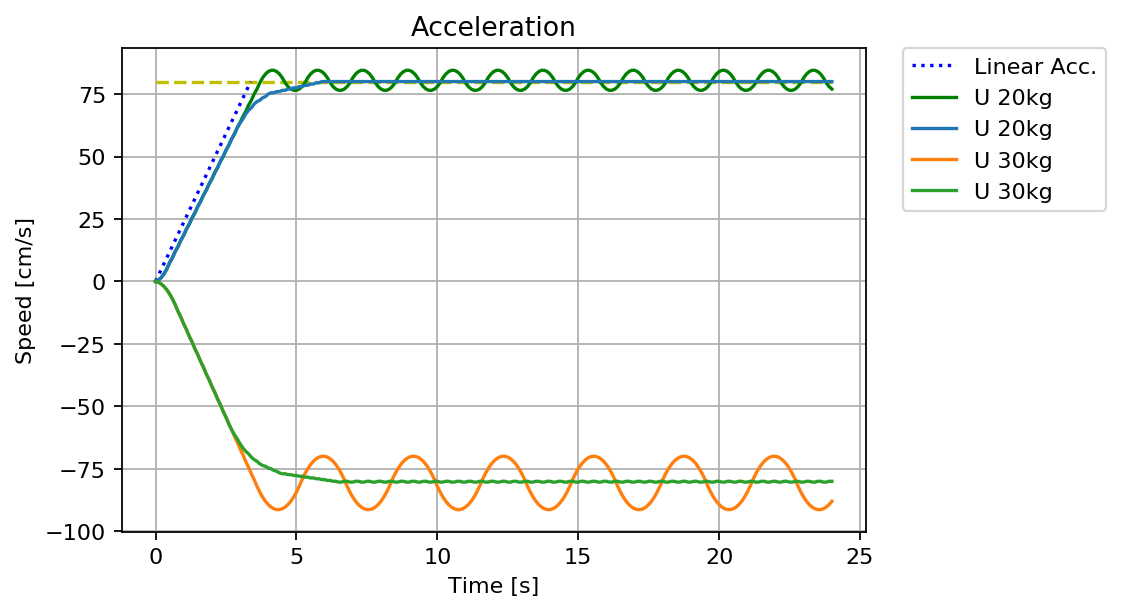

In [47]:
a  = 142 / 6 # base acceleration
T  = 24 # time frame
V  = 80 # autocruise speed
Fs = 0.1 # sampling rate
m  = 30 # mass kg
Ts  = np.arange(0, T + Fs, Fs) #sampling time

    
def autocruising2(_t, _m, _a, _Vt, _V0 = 0, _IncF = 100, _Fc = 0):
    """
       _t: list of time
       _m: mass in kg
       _a: base acceleration
      _Vt: desired autocruising velocity
      _V0: start velocity
    _IncF: increments for force in Newtons
      _Fc: start force / current force
    """
    _Ac = 0 # current acceleration
    _At = 0 # target acceleration
    _Tf = 1 # advence for future acceleration
    _Vf = 0 # future velocity
    _Af = 0 # future acceleration
    _v = [_V0] # velocities [start velocity]
    _MaxF = 1000
    for i, time in enumerate(_t):
        if i == 0:
            continue
        _Vf = _Ac * _Tf + _v[i-1]
        if (_Ac > 0 and _Vf > _Vt) or (_Ac < 0 and _Vf < _Vt):
            _At = (_Vt - _Vf) / _Tf
        else:
            _At = ( math.copysign(_a, _Vt - _v[i-1]) if (_v[i-1] != _Vt) else 0)
        if (_Ac != _At):
            _Fc = _Fc + math.copysign(_IncF, _At - _Ac)
        if (_MaxF < math.copysign(_Fc, 1)):
            _Fc = math.copysign(_MaxF, _Fc)
        _Ac = _Fc / _m
        _t_diff = _t[i] - _t[i-1]
        _v.append(_v[i-1] + _Ac * _t_diff)
    return _v


#x = np.linspace(1, 1, 300)
#y = np.arange(0,150, 0.5)
plt.figure(dpi=160)
plt.grid(True)
plt.title('Acceleration')
plt.plot([0,T],[V,V],'y--')
plt.plot([0,V / a],[0,V],'b:', label='Linear Acc.')
plt.plot(Ts, autocruising(Ts, 20, a, V), 'g', label='U 20kg')
plt.plot(Ts, autocruising2(Ts, 20, a, V), label='U 20kg')
plt.plot(Ts, autocruising(Ts, 30, a, -V), label='U 30kg')
plt.plot(Ts, autocruising2(Ts, 30, a, -V), label='U 30kg')
plt.xlabel('Time [s]')
plt.ylabel('Speed [cm/s]')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [9]:
math.copysign(-5,1)

5.0